Inspired by https://kapernikov.com/ipywidgets-with-matplotlib/

In [1]:
# requires python-ipympl from AUR

%matplotlib widget

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def say_my_name(name):
    """
    Print the current widget value in short sentence
    """
    print(f'My name is {name}')
     
widgets.interact(say_my_name, name=["Jim", "Emma", "Bond"]);

interactive(children=(Dropdown(description='name', options=('Jim', 'Emma', 'Bond'), value='Jim'), Output()), _…

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

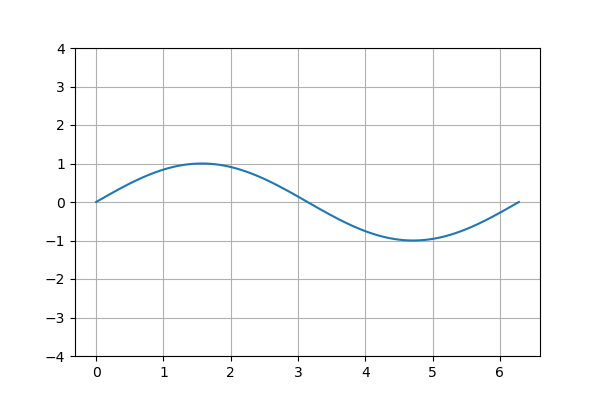

In [3]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')

FloatSlider(value=1.0, continuous_update=False, description='$\\omega$', max=10.0)

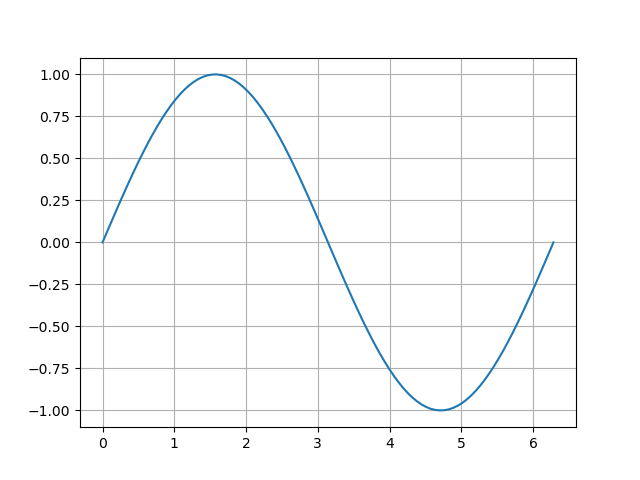

In [8]:
x = np.linspace(0, 2 * np.pi, 100)
 
fig, ax = plt.subplots()
line, = ax.plot(x, np.sin(x))
ax.grid(True)
 
def update(change):
    line.set_ydata(np.sin(change.new * x))
    fig.canvas.draw()
     
int_slider = widgets.FloatSlider(
    value=1, 
    min=0, max=10, step=.1,
    description='$\omega$',
    continuous_update=False
)
int_slider.observe(update, 'value')
int_slider